# 1. Imports

In [22]:
%%capture
from __future__ import division
import numpy as np
import pandas as pd
import scipy.stats as st
import itertools
import math
from collections import Counter, defaultdict
%load_ext autoreload
%autoreload 2

from copy import deepcopy
import pickle
import os
import json
from tqdm import tqdm
from tqdm import tqdm_notebook

from IPython.display import Image
import PIL.Image as pil
import random
import matplotlib as mpl
mpl.use("Agg")
import matplotlib.pylab as plt
#%matplotlib notebook
%matplotlib inline
%load_ext base16_mplrc
%base16_mplrc light solarized
#%base16_mplrc dark solarized
plt.rcParams['grid.linewidth'] = 0
plt.rcParams['figure.figsize'] = (16.0, 10.0)

import phrase_selection.filter_coco as fc


# 2. Penn Tree bank reference

## 2.1 Bracket Labels

### 2.1.1 Clause Level

S - simple declarative clause, i.e. one that is not introduced by a (possible empty) subordinating conjunction or a wh-word and that does not exhibit subject-verb inversion.

SBAR - Clause introduced by a (possibly empty) subordinating conjunction.

SBARQ - Direct question introduced by a wh-word or a wh-phrase. Indirect questions and relative clauses should be bracketed as SBAR, not SBARQ.

SINV - Inverted declarative sentence, i.e. one in which the subject follows the tensed verb or modal.

SQ - Inverted yes/no question, or main clause of a wh-question, following the wh-phrase in SBARQ.

### 2.1.2 Phrase Level

ADJP - Adjective Phrase.

ADVP - Adverb Phrase.

CONJP - Conjunction Phrase.

FRAG - Fragment.

INTJ - Interjection. Corresponds approximately to the part-of-speech tag UH.

LST - List marker. Includes surrounding punctuation.

NAC - Not a Constituent; used to show the scope of certain prenominal modifiers within an NP.

NP - Noun Phrase. 

NX - Used within certain complex NPs to mark the head of the NP. Corresponds very roughly to N-bar level but used quite differently.

PP - Prepositional Phrase.

PRN - Parenthetical. 

PRT - Particle. Category for words that should be tagged RP. 

QP - Quantifier Phrase (i.e. complex measure/amount phrase); used within NP.

RRC - Reduced Relative Clause. 

UCP - Unlike Coordinated Phrase. 

VP - Vereb Phrase. 

WHADJP - Wh-adjective Phrase. Adjectival phrase containing a wh-adverb, as in how hot.

WHAVP - Wh-adverb Phrase. Introduces a clause with an NP gap. May be null (containing the 0 complementizer) or lexical, containing a wh-adverb such as how or why.

WHNP - Wh-noun Phrase. Introduces a clause with an NP gap. May be null (containing the 0 complementizer) or lexical, containing some wh-word, e.g. who, which book, whose daughter, none of which, or how many leopards.

WHPP - Wh-prepositional Phrase. Prepositional phrase containing a wh-noun phrase (such as of which or by whose authority) that either introduces a PP gap or is contained by a WHNP.

X - Unknown, uncertain, or unbracketable. X is often used for bracketing typos and in bracketing the...the-constructions.

### 2.1.3 Word level

CC - Coordinating conjunction

CD - Cardinal number

DT - Determiner

EX - Existential there

FW - Foreign word

IN - Preposition or subordinating conjunction

JJ - Adjective

JJR - Adjective, comparative

JJS - Adjective, superlative

LS - List item marker

MD - Modal

NN - Noun, singular or mass

NNS - Noun, plural

NNP - Proper noun, singular

NNPS - Proper noun, plural

PDT - Predeterminer

POS - Possessive ending

PRP - Personal pronoun

PRP$ - Possessive pronoun (prolog version PRP-S)

RB - Adverb

RBR - Adverb, comparative

RBS - Adverb, superlative

RP - Particle

SYM - Symbol

TO - to

UH - Interjection

VB - Verb, base form

VBD - Verb, past tense

VBG - Verb, gerund or present participle

VBN - Verb, past participle

VBP - Verb, non-3rd person singular present

VBZ - Verb, 3rd person singular present

WDT - Wh-determiner

WP - Wh-pronoun

WP$ - Possessive wh-pronoun (prolog version WP-S)

WRB - Wh-adverb

## 2.2 Function tags

### 2.2.1 Grammatical role

-DTV (dative) - marks the dative object in the unshifted form of the double object construction. If the preposition introducing the "dative" object is for, it is considered benefactive (-BNF). -DTV (and -BNF) is only used after verbs that can undergo dative shift.

-LGS (logical subject) - is used to mark the logical subject in passives. It attaches to the NP object of by and not to the PP node itself.

-PRD (predicate) - marks any predicate that is not VP. In the do so construction, the so is annotated as a predicate.

-PUT - marks the locative complement of put. 

-SBJ (surface subject) - marks the structural surface subject of both matrix and embedded clauses, including those with null subjects.

-TPC ("topicalized") - marks elements that appear before the subject in a declarative sentence, but in two cases only:

if the front element is associated with a *T* in the position of the gap.

if the fronted element is left-dislocated (i.e. it is associated with a resumptive pronoun in the position of the gap).

-VOC (vocative) - marks nouns of address, regardless of their position in the sentence. It is not coindexed to the subject and not get -TPC when it is sentence-initial.

### 2.2.2 Adverbials

Adverbials are generally VP adjuncts.



-BNF (benefactive) - marks the beneficiary of an action (attaches to NP or PP). 

This tag is used only when (1) the verb can undergo dative shift and (2) the prepositional variant (with the same meaning) uses for. The prepositional objects of dative-shifting verbs with other prepositions than for (such as to or of) are annotated -DTV.

-DIR (direction) - marks adverbials that answer the questions "from where?" and "to where?" It implies motion, which can be metaphorical as in "...rose 5 pts. to 57-1/2" or "increased 70% to 5.8 billion yen" -DIR is most often used with verbs of motion/transit and financial verbs.

-EXT (extent) - marks adverbial phrases that describe the spatial extent of an activity. -EXT was incorporated primarily for cases of movement in financial space, but is also used in analogous situations elsewhere. Obligatory complements do not receive -EXT. Words such as fully and completely are absolutes and do not receive -EXT. 

-LOC (locative) - marks adverbials that indicate place/setting of the event. -LOC may also indicate metaphorical location. There is likely to be some varation in the use of -LOC due to differing annotator interpretations. In cases where the annotator is faced with a choice between -LOC or -TMP, the default is -LOC. In cases involving SBAR, SBAR should not receive -LOC. -LOC has some uses that are not adverbial, such as with place names that are adjoined to other NPs and NAC-LOC premodifiers of NPs. The special tag -PUT is used for the locative argument of put.

-MNR (manner) - marks adverbials that indicate manner, including instrument phrases.

-PRP (purpose or reason) - marks purpose or reason clauses and PPs.

-TMP (temporal) - marks temporal or aspectual adverbials that answer the questions when, how often, or how long. It has some uses that are not strictly adverbial, auch as with dates that modify other NPs at S- or VP-level. In cases of apposition involving SBAR, the SBAR should not be labeled -TMP. Only in "financialspeak," and only when the dominating PP is a PP-DIR, may temporal modifiers be put at PP object level. Note that -TMP is not used in possessive phrases.

### 2.2.3 Miscellaneous

-CLR (closely related) - marks constituents that occupy some middle ground between arguments and adjunct of the verb phrase. These roughly correspond to "predication adjuncts", prepositional ditransitives, and some "phrasel verbs". Although constituents marked with -CLR are not strictly speaking complements, they are treated as complements whenever it makes a bracketing difference. The precise meaning of -CLR depends somewhat on the category of the phrase.

on S or SBAR - These categories are usually arguments, so the -CLR tag indicates that the clause is more adverbial than normal clausal arguments. The most common case is the infinitival semi-complement of use, but there are a variety of other cases.

on PP, ADVP, SBAR-PRP, etc - On categories that are ordinarily interpreted as (adjunct) adverbials, -CLR indicates a somewhat closer relationship to the verb. For example:

Prepositional Ditransitives

In order to ensure consistency, the Treebank recognizes only a limited class of verbs that take more than one complement (-DTV and -PUT and Small Clauses) Verbs that fall outside these classes (including most of the prepositional ditransitive verbs in class [D2]) are often associated with -CLR.

### 2.2.4 Phrasal verbs

Phrasal verbs are also annotated with -CLR or a combination of -PRT and PP-CLR. Words that are considered borderline between particle and adverb are often bracketed with ADVP-CLR.

Predication Adjuncts

Many of Quirk's predication adjuncts are annotated with -CLR.

on NP - To the extent that -CLR is used on NPs, it indicates that the NP is part of some kind of "fixed phrase" or expression, such as take care of. Variation is more likely for NPs than for other uses of -CLR.

-CLF (cleft) - marks it-clefts ("true clefts") and may be added to the labels S, SINV, or SQ.

-HLN (headline) - marks headlines and datelines. Note that headlines and datelines always constitute a unit of text that is structurally independent from the following sentence.

-TTL (title) - is attached to the top node of a title when this title appears inside running text. -TTL implies -NOM. The internal structure of the title is bracketed as usual.

### 2.2.5 Form/function discrepancies

-ADV (adverbial) - marks a constituent other than ADVP or PP when it is used adverbially (e.g. NPs or free ("headless" relatives). However, constituents that themselves are modifying an ADVP generally do not get -ADV. If a more specific tag is available (for example, -TMP) then it is used alone and -ADV is implied. See the Adverbials section.

-NOM (nominal) - marks free ("headless") relatives and gerunds when they act nominally.

# 3. MS coco captions

## 3.1 phrases from captions

todo: remove shot (like pic) from phrases

In [50]:
import pickle
import phrase_selection.filter_coco as fc
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [51]:
coco_dir = '/Users/schwenk/wrk/pictionary/coco' 

In [52]:
with open('just_pos_tags_62k_v1.pkl', 'rb') as f:
    precomputed_pos_tags = pickle.load(f)

In [53]:
phrases_v01 = fc.run_phrase_selection(coco_dir, precomputed_pos_tags)

Filtering out no-verb captions: 100%|██████████| 73497/73497 [00:00<00:00, 309583.87it/s]


In [30]:
len(phrases_v01)

60631

In [32]:
# keyed_on_pid = {}
# for k, phrase in tqdm(phrases_v01.items()):
#     phrase['perplexity'] = perpl_lookup[k]
#     phrase['least_common_word_freq'] = fc.least_common_word(phrase)
#     keyed_on_pid[phrase['p_id']] = phrase

In [15]:
# with open('iconary_phrases_v1_62k.json', 'w') as f:
#     json.dump(keyed_on_pid, f, indent=True)

In [54]:
with open('profane.json', 'r') as f:
    profane_words = json.load(f)

In [55]:
with open('forbidden_words.json', 'r') as f:
    reload_profane_words = json.load(f)

In [56]:
from wordfreq import zipf_frequency

In [57]:
profane_freqs = pd.Series({w: zipf_frequency(w, 'en') for w in reload_profane_words})

In [58]:
# pd.Series(profane_freqs.sort_values(ascending=False)[:300].index).to_csv('man_rev.csv', index=False)

In [59]:
man_pass_words = pd.read_csv('./man_rev.csv', header=None)[0].tolist()
man_pass_words = [w +'s' for w in man_pass_words] + man_pass_words

In [60]:
man_passed_profane_words = [w for w in reload_profane_words if w not in man_pass_words]

In [61]:
with open('forbidden_words_rev.json', 'w') as f:
    json.dump(man_passed_profane_words, f, indent=2)

In [62]:
'kicking' in man_passed_profane_words

False

In [63]:
processed_profane = set([w.lower().replace('*', '').strip() for w in profane_words])
processed_profane.update(set([w.lower().replace('*', '').strip() + 's' for w in profane_words]))

In [64]:
curated_profane = pd.read_csv('curated_profane.csv', header=None)[0]
curated_profane = curated_profane.tolist()
curated_profane += [w + 's' for w in curated_profane]

In [68]:
final_profane_list = processed_profane.difference(allowed_profane)

In [69]:
with open('forbidden_words.json', 'w') as f:
    json.dump(sorted(list(final_profane_list)), f, indent=3)

In [70]:
matches = set([])
for pid, p in list(phrases_v01.items()):
    bad_words= set(p['tokens']).intersection(processed_profane)
    matches.update(bad_words)
#     if bad_words:
#         print(bad_words, p['caption'])

In [71]:
allowed_profane = matches.difference(set(curated_profane))

In [72]:
for pid, p in list(phrases_v01.items()):
    if 'woody' in p['tokens']:
        print(p['caption'])

an empty wooden bench sitting in a woody area
a train on tracks riding through a woody forest


In [73]:
# pd.Series(list(matches)).sort_values().to_csv('curated_profane.csv', index=False)

In [74]:
%page matches

In [75]:
cleaned_phrases = {}
for pid, p in list(phrases_v01.items()):
    bad_words= set(p['tokens']).intersection(final_profane_list)
    if not bad_words:
        cleaned_phrases[pid] = p 

In [76]:
dsdf = pd.DataFrame(list(cleaned_phrases.values()))

In [77]:
len(cleaned_phrases)

59859

In [78]:
dsdf[['p_id', 'c_id', 'caption']].sample(frac=0.05).to_csv('ds_v_0p1_sample.csv', index=False)

In [79]:
dsdf.shape

(59859, 8)

In [80]:
dsdf.to_pickle('62k_phrase_df.pkl')

In [19]:
# dsdf[['p_id', 'c_id', 'caption']].to_csv('coco_62k_captions.csv', index=False)

In [77]:
fc.form_iconary_input_files(phrases_v01.values(), 'coco_62k')

In [145]:
qual_phrases = [phrases_v01[i] for i in selected_ids]

In [146]:
fc.form_iconary_input_files(qual_phrases, 'qual_200')

### 3.1.1 hide

In [42]:
just_pos_tags_60k = {v['c_id']: v['pos_tags'] for k, v in phrases_v01.items()}

with open('just_pos_tags_62k_v1.pkl', 'wb') as f:
      pickle.dump(just_pos_tags_60k, f)

with open('phrase_ds_v0p1.pkl', 'wb') as f:
      pickle.dump(phrases_v01, f)

## 3.2 perplexity

In [17]:
coco_perplexity = pd.read_csv('./output_perplexity_coco62k_captions.txt', header=None)
coco_perplexity.columns = ['p_id','c_id', 'phrase', 'perplexity']
coco_perplexity = coco_perplexity[['phrase', 'p_id','c_id', 'perplexity']]
coco_perplexity['c_id'] = coco_perplexity['c_id'].apply(lambda x: x.strip())
coco_perplexity.head(5)

,phrase,p_id,c_id,perplexity
0,a large passenger airplane flying through the...,coco_dp_id_000001,74ba8bdff7681c5f398325507f754c52,-5.174545
1,the bike has a clock as a tire,coco_dp_id_000002,39e3f8fd6f03168f888d0d7b69ce6542,-6.239627
2,two cars parked on the sidewalk on the street,coco_dp_id_000003,1c4471263a52fd264876052952ea969b,-4.371350
3,a group of motorcycle riders driving past bui...,coco_dp_id_000004,63b896a3cd6282b1de9d8373e17e9ee7,-6.030856
4,a random plane in the sky flying alone,coco_dp_id_000005,33cc3226dafcbed2029d37ff03fbc23b,-6.755549


In [11]:
build_perpl_lookup = coco_perplexity[['c_id', 'perplexity']].to_dict(orient='records')

In [12]:
perpl_lookup = {p['c_id']: p['perplexity'] for p in  build_perpl_lookup}

In [299]:
# with open('perpl_lookup.pkl', 'wb') as f:
#     pickle.dump(perpl_lookup, f)

In [183]:
# _ = coco_perplexity['perplexity'].hist(bins=50)

In [126]:
# _ = coco_perplexity['perplexity'].plot()

# 4. splits

In [23]:
split_dfs = {   
    'coco_train_10k': pd.read_pickle('train_caption_10k.pkl'),
    'coco_test_5k': pd.read_pickle('test_caption_5k.pkl'),
    'reserve_caption_10k': pd.read_pickle('reserve_caption_10k.pkl')
}

In [24]:
train_10k_df = split_dfs['coco_train_10k']

In [25]:
# set(split_dfs['reserve_caption_10k']['c_id'].tolist()).intersection(set(split_dfs['coco_train_10k']['c_id'].tolist()))

In [26]:
# ids_without_num_values = set(dsdf['c_id'].tolist())

In [81]:
# with open('./cleaned_phrases_60k.pkl', 'wb') as f:
#     pickle.dump(cleaned_phrases, f)

In [30]:
for split_name, splif_df in split_dfs.items():
    orig_split_ids = set(splif_df['c_id'].tolist())
    new_split= [cleaned_phrases[i] for i in orig_split_ids if i in cleaned_phrases]
    new_df = pd.DataFrame(new_split)
    outname = split_name + '_no_profane.pkl'
    new_df.to_pickle(outname)
#     fc.form_iconary_input_files(new_split, split_name)

NameError: name 'cleaned_phrases' is not defined

In [13]:
with open('forbidden_words.json', 'r') as f:
    test_list = json.load(f)

In [15]:
# all_coco_words.intersection(set(forbidden))

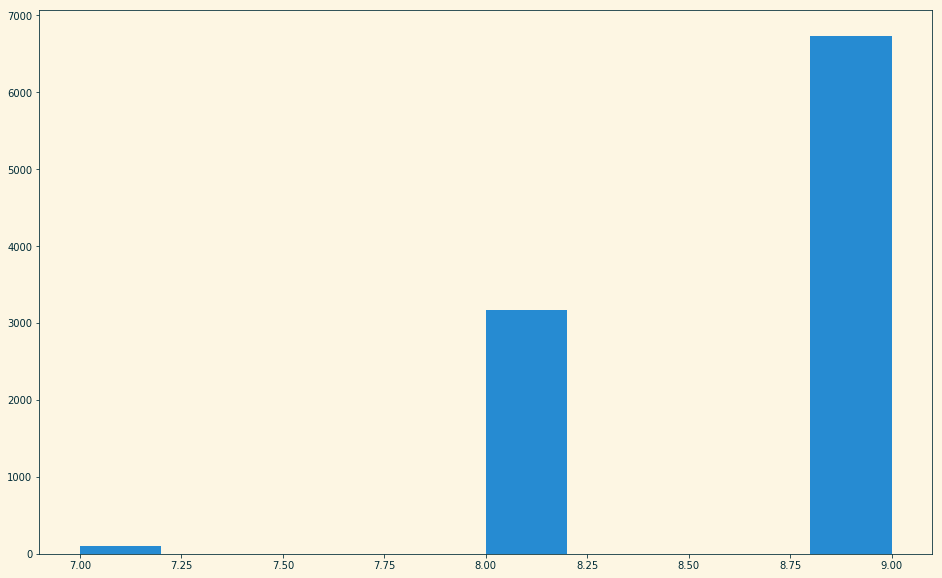

In [16]:
_ = train_10k_df['phrase'].str.split().apply(len).hist()

# 5. update active phrases

In [33]:
# with open('./cleaned_phrases_60k.pkl', 'rb') as f:
#     cleaned_60k_no_profane = pickle.load(f)

In [41]:
split_dfs = {   
    'coco_train_10k': pd.read_pickle('coco_train_10k_no_profane.pkl'),
    'coco_test_5k': pd.read_pickle('coco_test_5k_no_profane.pkl'),
    'reserve_caption_10k': pd.read_pickle('reserve_caption_10k_no_profane.pkl')
}

In [35]:
retired_phrases_df = pd.read_pickle('../turk_task/phrases_to_remove_after_10k.pkl')
retired_phrases = set(retired_phrases_df.index)

In [36]:
retired_phrases_df['c_id'] = retired_phrases_df.index

In [37]:
retired_phrases_df[['c_id', 'word']].to_json('retired_phrases.json', orient='records')

In [82]:
split_name = 'coco_train_10k'
splif_df = split_dfs[split_name]
orig_split_ids = set(splif_df['c_id'].tolist())
new_split= [cleaned_phrases[i] for i in orig_split_ids if i in cleaned_phrases and i not in retired_phrases]
fc.form_iconary_input_files(new_split, split_name)

In [88]:
new_dfs = []
for split_name, splif_df in split_dfs.items():
    orig_split_ids = set(splif_df['c_id'].tolist())
    new_split = [cleaned_phrases[i] for i in orig_split_ids if i in cleaned_phrases and i not in retired_phrases]
    new_df = pd.DataFrame(new_split)
    new_df['split'] = split_name
    new_dfs.append(new_df)
    print(len(new_split))
#     fc.form_iconary_input_files(new_split, split_name)

9817
4930
9873


In [90]:
combined_25k_df = pd.concat(new_dfs)

In [93]:
# combined_25k_df.to_pickle('combined_25k_splits_df.pkl')

# post 10k games phrase cleanup

In [96]:
body_parts = [
                'arm',
                'hand',
                'leg',
                'foot',
                'head',
                'eye',
                'hip',
                'shoulder',
                'mouth',
                'lip',
                'chest',
                'back',
                'torso',
                'neck',
                'ear',
                'eyebrow',
                'finger',
                'feet',
                'toe',
                'thumb',
                'cheek',
                'tongue',
                'tooth',
                'teeth',
                'stomach',
                'tummy',
                'belly',
                'hair',
                'face',
                'waist',
                'nose',
                'beard',
                'knee',
                'elbow',
                'brow'
            ]

In [84]:
train_df = split_dfs['coco_train_10k']

In [85]:
train_df.shape

(9866, 8)

In [137]:
possesive_pronouns = ['his', 'her', 'their']

In [126]:
remove_interesection = combined_25k_df['tokens'].apply(lambda x: set(x).intersection(remove_tokens))

In [127]:
remove_words = remove_interesection[remove_interesection.apply(bool)].apply(set.pop)

In [128]:
remove_words.value_counts()

that     2432
there    1026
which       5
Name: tokens, dtype: int64

In [195]:
exam_1 = combined_25k_df[combined_25k_df['tokens'].apply(lambda x: 'their' in x)]

In [154]:
most_there_phrases = set(combined_25k_df[combined_25k_df['caption'].str.contains('there is')].c_id.tolist() + combined_25k_df[combined_25k_df['caption'].str.contains('there are')].c_id.tolist())

In [159]:
exam_1[~exam_1['c_id'].isin(most_there_phrases)]

,c_id,caption,coco_c_id,coco_im_id,p_id,pos_tags,raw_caption,tokens,split
1955,6d006da4a0c50f847b4acfcecb9af235,she is holding an umbrella there on the street,366954,281837,coco_dp_id_004409,"[(she, PRP), (is, VBZ), (holding, VBG), (an, D...",She is holding an umbrella there on the street.,"[she, is, holding, an, umbrella, there, on, th...",coco_test_5k
2473,f693584fc65b01d09738ae4a85e71aed,there have been many different pieces of art c...,761186,534271,coco_dp_id_002788,"[(there, EX), (have, VBP), (been, VBN), (many,...",There have been many different pieces of art c...,"[there, have, been, many, different, pieces, o...",reserve_caption_10k
3567,99ba684d41cce56099d201fa755e61e9,there was no room for him to sit,367225,557627,coco_dp_id_030394,"[(there, EX), (was, VBD), (no, DT), (room, NN)...",There was no room for him to sit.,"[there, was, no, room, for, him, to, sit]",reserve_caption_10k


In [144]:
#combined_25k_df.head(1)

In [191]:
cleaned_25k_df = deepcopy(combined_25k_df)

In [192]:
remove_phrases = ['there are ', 'there is ', 'that ', ]

In [193]:
for rp in remove_phrases:
    cleaned_25k_df['caption'] = cleaned_25k_df.caption.str.replace(rp, '')

cleaned_25k_df = cleaned_25k_df[~cleaned_25k_df['caption'].apply(lambda x: 'there ' in x)]

In [ ]:
def remove_possesives(phrase_tokens):
    for idx, t in enumerate(phrase_tokens):

In [198]:
# cleaned_25k_df['tokens']

# perplexity computation

# SAB set

10k games 
2k games 